## Seven Days of Code - Day 4

### Recommendation System

Day four of Seven Days of Code project
<p>More about the project <a href="https://7daysofcode.io/matricula/data-science">
here</a>.</p>

<p>Reference <a href="https://medium.com/data-hackers/criando-sistemas-de-recomenda%C3%A7%C3%A3o-em-python-ef350f601e3d" target="_blank">
here</a> and <a href="https://analyticsindiamag.com/how-to-build-your-first-recommender-system-using-python-movielens-dataset/" target="_blank"> here</a></p>


<p>Data Source <a href="https://grouplens.org/datasets/movielens/" target="_blank" >here</a> </p>

<b>
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

<b>From README.txt</b>

<p>SUMMARY & USAGE LICENSE</p>

-------------------------------------------------------------------------------------------------------------------------------

MovieLens data sets were collected by the GroupLens Research Project
at the University of Minnesota.
 
This data set consists of:
	* 100,000 ratings (1-5) from 943 users on 1682 movies. 
	* Each user has rated at least 20 movies. 
        * Simple demographic info for the users (age, gender, occupation, zip)

The data was collected through the MovieLens web site
(movielens.umn.edu) during the seven-month period from September 19th, 
1997 through April 22nd, 1998. This data has been cleaned up - users
who had less than 20 ratings or did not have complete demographic
information were removed from this data set.

In [1]:
#Import libraries
import pandas as pd
import numpy as np

In [2]:
#Import datasets
movies = pd.read_csv('movies.csv')
ratings = pd.read_csv('ratings.csv')

In [3]:
#Reading movies
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
#Reading ratings
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [5]:
#Merge movies and ratings using left join
data = ratings.merge(movies,on='movieId',how='left')
data.head()

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama


In [6]:
#Describe data
data.describe().round(1)

,userId,movieId,rating,timestamp
count,100004.0,100004.0,100004.0,1.000040e+05
mean,347.0,12548.7,3.5,1.129639e+09
std,195.2,26369.2,1.1,1.916858e+08
min,1.0,1.0,0.5,7.896520e+08
25%,182.0,1028.0,3.0,9.658478e+08
50%,367.0,2406.5,4.0,1.110422e+09
75%,520.0,5418.0,4.0,1.296192e+09
max,671.0,163949.0,5.0,1.476641e+09


In [7]:
#Movie with the highest grade
data.loc[data['movieId'] == 163949]

,userId,movieId,rating,timestamp,title,genres
80823,547,163949,5.0,1476419239,The Beatles: Eight Days a Week - The Touring Y...,Documentary


In [8]:
#Movie with the lowest grade

#Toy Story was voted lots of times, so I had to include a condition to return only the rows with the lowest rating
#And, yes, someone dared to rate Toy Story "1.0" 


data.loc[(data['movieId'] == 1) & (data['rating'] == 1.0)]

,userId,movieId,rating,timestamp,title,genres
14886,97,1,1.0,1460342505,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
45185,318,1,1.0,862902604,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
70496,490,1,1.0,851786086,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
73210,510,1,1.0,944346953,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy


In [9]:
#Count of ratings
count = data.groupby(['rating']).count()['userId'].round()
count

rating
0.5     1101
1.0     3326
1.5     1687
2.0     7271
2.5     4449
3.0    20064
3.5    10538
4.0    28750
4.5     7723
5.0    15095
Name: userId, dtype: int64

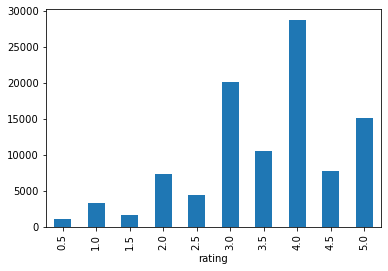

In [10]:
count.plot(kind='bar');

In [11]:
average = data.groupby(['rating']).mean()['userId'].round()
average

rating
0.5    311.0
1.0    345.0
1.5    341.0
2.0    349.0
2.5    331.0
3.0    353.0
3.5    337.0
4.0    349.0
4.5    347.0
5.0    349.0
Name: userId, dtype: float64

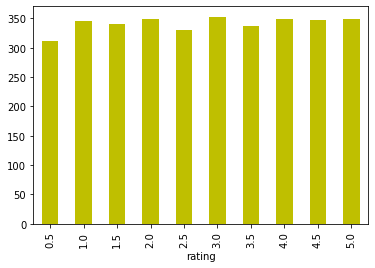

In [13]:
average.plot(kind='bar',color='y');

In [27]:
#Unique count
data.nunique()

userId         671
movieId       9066
rating          10
timestamp    78141
title         9064
genres         901
dtype: int64

From the return above, it can be seen that 671 users rated 9066 different movies using 10 different ratings.<p> 
The fact that the count of titles is a bit lower than the movieId count suggests that there are different movies with the same name

#### Recommendation based on Popularity

In [28]:
#DataFrame with movieId with more than 200 ratings
new_data = data.groupby('movieId').filter(lambda x:x['rating'].count()>=200)

In [29]:
new_data

,userId,movieId,rating,timestamp,title,genres
23,2,47,4.0,835355552,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
24,2,50,4.0,835355586,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
27,2,110,4.0,835355532,Braveheart (1995),Action|Drama|War
29,2,150,5.0,835355395,Apollo 13 (1995),Adventure|Drama|IMAX
49,2,296,4.0,835355395,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller
...,...,...,...,...,...,...
99916,671,1198,5.0,1064891024,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure
99945,671,2571,4.5,1064891076,"Matrix, The (1999)",Action|Sci-Fi|Thriller
99951,671,2858,4.0,1063503841,American Beauty (1999),Drama|Romance
99953,671,2959,4.0,1064890427,Fight Club (1999),Action|Crime|Drama|Thriller


In [38]:
#DataFrame with average rating and count of ratings by movieId
ratings_data = pd.DataFrame(new_data.groupby(['movieId','title']).rating.mean().round(2))
ratings_data

,,rating
movieId,title,
1,Toy Story (1995),3.87
47,Seven (a.k.a. Se7en) (1995),4.03
50,"Usual Suspects, The (1995)",4.37
110,Braveheart (1995),3.95
150,Apollo 13 (1995),3.90
260,Star Wars: Episode IV - A New Hope (1977),4.22
296,Pulp Fiction (1994),4.26
318,"Shawshank Redemption, The (1994)",4.49
356,Forrest Gump (1994),4.05


In [39]:
#Add a column with count of rating per movieId
ratings_data['rating_count'] = new_data.groupby(['movieId','title']).rating.count()

In [40]:
ratings_data

,,rating,rating_count
movieId,title,,
1,Toy Story (1995),3.87,247
47,Seven (a.k.a. Se7en) (1995),4.03,201
50,"Usual Suspects, The (1995)",4.37,201
110,Braveheart (1995),3.95,228
150,Apollo 13 (1995),3.90,200
260,Star Wars: Episode IV - A New Hope (1977),4.22,291
296,Pulp Fiction (1994),4.26,324
318,"Shawshank Redemption, The (1994)",4.49,311
356,Forrest Gump (1994),4.05,341


In [41]:
#Top 10 movies
ratings_data.sort_values(by='rating_count',ascending=False).head(10)

,,rating,rating_count
movieId,title,,
356,Forrest Gump (1994),4.05,341
296,Pulp Fiction (1994),4.26,324
318,"Shawshank Redemption, The (1994)",4.49,311
593,"Silence of the Lambs, The (1991)",4.14,304
260,Star Wars: Episode IV - A New Hope (1977),4.22,291
480,Jurassic Park (1993),3.71,274
2571,"Matrix, The (1999)",4.18,259
1,Toy Story (1995),3.87,247
527,Schindler's List (1993),4.30,244


In [52]:
#Global average ratings
C = ratings_data['rating'].mean()

In [54]:
round(C,2)

4.07

In [55]:
#Lower limit to be eligible to the ranking
M = ratings_data.rating_count.min()
M

200

In [56]:
#Weighted average for each item
def weighted_rating(x,M=M,C=C):
    V = x['rating_count']
    R = x['rating']
    
    return (V/(V+M)*R) + (M/(M/C)*C)

In [58]:
#Add score computed by weighted_rating to the DataFrame
ratings_data['score'] = ratings_data.apply(weighted_rating,axis=1).round(2)
ratings_data

,,rating,rating_count,score
movieId,title,,,
1,Toy Story (1995),3.87,247,18.69
47,Seven (a.k.a. Se7en) (1995),4.03,201,18.58
50,"Usual Suspects, The (1995)",4.37,201,18.75
110,Braveheart (1995),3.95,228,18.66
150,Apollo 13 (1995),3.90,200,18.51
260,Star Wars: Episode IV - A New Hope (1977),4.22,291,19.06
296,Pulp Fiction (1994),4.26,324,19.19
318,"Shawshank Redemption, The (1994)",4.49,311,19.29
356,Forrest Gump (1994),4.05,341,19.11


In [96]:
#Top 20 recommended movies
ranking = ratings_data.sort_values(by='score',ascending=False).head(20)
ranking

,,rating,rating_count,score
movieId,title,,,
318,"Shawshank Redemption, The (1994)",4.49,311,19.29
296,Pulp Fiction (1994),4.26,324,19.19
356,Forrest Gump (1994),4.05,341,19.11
260,Star Wars: Episode IV - A New Hope (1977),4.22,291,19.06
593,"Silence of the Lambs, The (1991)",4.14,304,19.05
527,Schindler's List (1993),4.30,244,18.92
2571,"Matrix, The (1999)",4.18,259,18.91
1196,Star Wars: Episode V - The Empire Strikes Back (1980),4.23,234,18.84
608,Fargo (1996),4.26,224,18.81


#### Save model

In [60]:
import pickle

In [97]:
#Dump
with open('top_20.pkl','wb') as file:
    pickle.dump(ranking,file)

In [100]:
#Load
with open('top_20.pkl','rb') as f:
    data = pickle.load(f)
    print((data, type(data)))

(                                                            rating  \
movieId title                                                        
318     Shawshank Redemption, The (1994)                      4.49   
296     Pulp Fiction (1994)                                   4.26   
356     Forrest Gump (1994)                                   4.05   
260     Star Wars: Episode IV - A New Hope (1977)             4.22   
593     Silence of the Lambs, The (1991)                      4.14   
527     Schindler's List (1993)                               4.30   
2571    Matrix, The (1999)                                    4.18   
1196    Star Wars: Episode V - The Empire Strikes Back ...    4.23   
608     Fargo (1996)                                          4.26   
858     Godfather, The (1972)                                 4.49   
2858    American Beauty (1999)                                4.24   
50      Usual Suspects, The (1995)                            4.37   
1198    Raiders of 